In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Grid

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(32,12)
plt.rcParams.update({'font.size':10})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
systems=["FA_G-prot"]

In [4]:
lipid_dir = {"FA_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6"}

In [5]:
def load_lipid_counts (lipid, cutoff=0.7):
    '''Load lipid counts within a cutoff in nm, the default is 0.7 nm'''
    #print ('Loading for cutoff:', cutoff)
    data_dir =  {"FA_G-prot":""}
    for s in systems:
        data_loc = []
        for r in range(3):
            try:
                if cutoff==1.0:
                    data_loc.append(np.loadtxt('COUNTS/{0:s}_{1:d}_number_of_{2:s}_within_{3:d}-nm.txt'.format(s,r,lipid,int(cutoff)), comments=('#', '@')))
                else:
                    data_loc.append(np.loadtxt('COUNTS/{0:s}_{1:d}_number_of_{2:s}_within_{3:2.1f}-nm.txt'.format(s,r,lipid,cutoff), comments=('#', '@')))
            except OSError:
                #print ('COUNTS/{0:s}_{1:d}_number_of_{2:s}_within_{3:2.1f}-nm.txt'.format(s,r,lipid,cutoff))
                #print ('Does not exists!')
                continue
        data_dir[s]=data_loc
    return data_dir

In [6]:
def avgNestedLists(nested_vals):
    """
    Averages a 2-D array and returns a 1-D array of all of the columns
    averaged together, regardless of their dimensions.
    """
    output = []
    maximum = 0
    for lst in nested_vals:
        if len(lst) > maximum:
            maximum = len(lst)
    for index in range(maximum): # Go through each index of longest list
        temp = []
        for lst in nested_vals: # Go through each list
            if index < len(lst): # If not an index error
                temp.append(lst[index])
        output.append(np.nanmean(temp))
    return output

def stdNestedLists(nested_vals):
    """
    Averages a 2-D array and returns a 1-D array of all of the columns
    averaged together, regardless of their dimensions.
    """
    output = []
    maximum = 0
    for lst in nested_vals:
        if len(lst) > maximum:
            maximum = len(lst)
    for index in range(maximum): # Go through each index of longest list
        temp = []
        for lst in nested_vals: # Go through each list
            if index < len(lst): # If not an index error
                temp.append(lst[index])
        output.append(np.nanstd(temp))
    return output

In [7]:
def counts (systems):
    ''''''
    data_dir =  {"FA_G-prot":""}
    
    std_dir =  {"FA_G-prot":""}
    
    N=100
    #color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
    fig, ax = plt.subplots(ncols=7, sharey=True, sharex=True, figsize=(cm2inch(40,6)))
    A = []
    
    unique_lipids = ['POPC','POPS','POPE','POPA','POPG', 'CHOL', 'PAP6', 'DPSM', 'DPG3']

    for idx, l in enumerate(unique_lipids):
        dir_data = load_lipid_counts(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape] for i in data ])
            
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                data_dir[s] = Ava
                std_dir[s]  = Std
                ax[idx].plot(running_mean(Ava, N=N), label=s, color=color_list[ndx])
                #ax[idx].fill_between(Ava, Ava-Std, Ava+Std, alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[idx].set_title(l)
                ax[idx].set_xlabel(r'$\mu$s')
                
    ax[0].legend(loc='upper center', bbox_to_anchor=(3, -0.3),
              fancybox=True, shadow=True, ncol=4, frameon=False)
    #ax[0].set_xticks([0,5000,10000])
    #ax[0].set_xticklabels([0,5,10])
    ax[0].set_ylabel('counts')
                
    return data_dir, std_dir

In [50]:

def counts_complex (systems, cutoff=0.7):
    ''''''
    N=5
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
    fig, ax = plt.subplots(ncols=9, sharey=True, sharex=True, figsize=(cm2inch(40,6)))
    #fig, ax = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(cm2inch(40,6)))
    
    unique_lipids = ['POPC','POPS','POPE','POPA','POPG', 'CHOL', 'PAP6', 'DPSM', 'DPG3']
    #unique_lipids = ['POPC','DPGM3']

    for idx, l in enumerate(unique_lipids):
        dir_data = load_lipid_counts(l, cutoff=cutoff)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                Ava = avgNestedLists(data)
                Std = stdNestedLists(data)
                run_ava = running_mean(Ava, N=N)
                run_std = running_mean(Std, N=N)
                x = range(len(run_ava))
                ax[idx].errorbar(x, run_ava, yerr=run_std, label=s, color=color_list[ndx], alpha=0.7,errorevery=500)
                ax[idx].set_title(l)
                ax[idx].set_xlabel(r'$\mu$s')
                
    ax[0].legend(loc='upper center', bbox_to_anchor=(3, -0.3),
              fancybox=True, shadow=True, ncol=4, frameon=False)

    #ax[0].set_xticklabels([0,10,20])
    #Each count equal 1 ns
    ax[0].set_xlim(0,10000)
    ax[0].set_xticks([0, 5000,10000])
    ax[0].set_xticklabels([0, 5,10])
    ax[0].set_ylabel('counts')
    plt.tight_layout()

    plt.savefig('Lipid_counts_{0:2.1f}nm_complex_frist10ms.png'.format(cutoff), dpi=300, bbox_inches='tight')
    return 

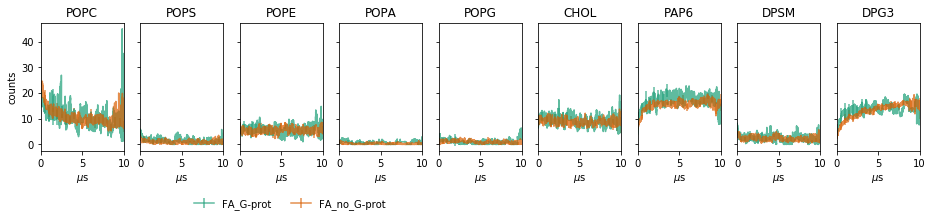

In [51]:
systems = ["FA_G-prot", "FA_no_G-prot"]
counts_complex(systems)

In [32]:
10000/ 1000

10.0

In [33]:
5000 / 1000


5.0

In [ ]:
dir_data = load_lipid_counts("POPC", cutoff=0.7)